# 월별, 지역별, 개인카드 사용현황

### 1. 파일 전처리 저장 함수

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from openpyxl import load_workbook
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') # For Windows # 한글폰트

def card_spend():
    data = pd.read_excel("data/1. 월별, 지역별, 개인 카드사용 현황.xlsx")
    data.sort_values(by='사용금액(조원)기준년월', inplace=True) # 연도 오름차순 정렬
    data.drop([0], inplace=True) # 불필요한 행 제거
    # 전국 평균 구하기
    data.set_index("사용금액(조원)기준년월", inplace =True) # 평균 구하기 위해 인덱스 설정
    data['전국평균'] = data.mean(axis=1) # 평균구하기
    data.reset_index(inplace=True) # 인덱스 재설정
    data.to_csv('C:/Users/acorn/Acon_jaeseo/teamproject/data/card_spend_pre_data.csv', encoding='utf-8-sig')
    print("저장이 완료되었습니다.")
    
card_spend()

저장이 완료되었습니다.


### 2-1. 지역별 그래프

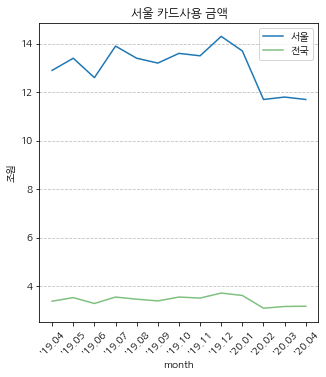

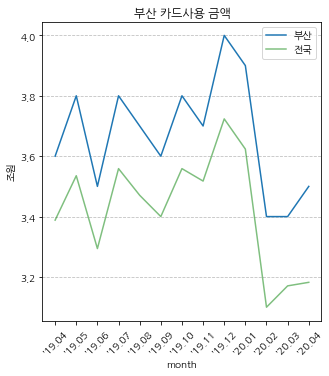

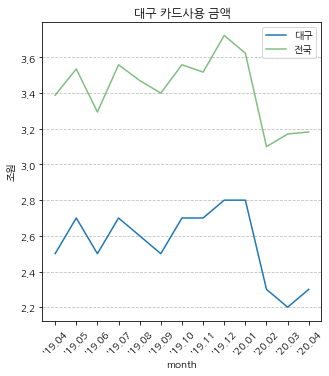

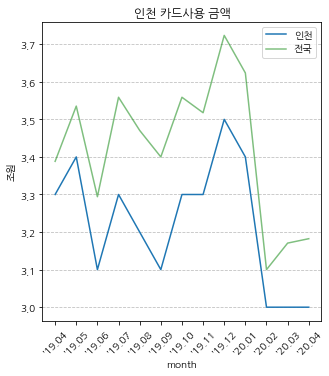

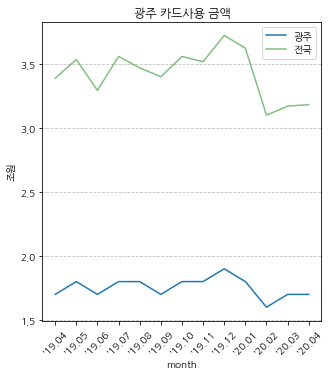

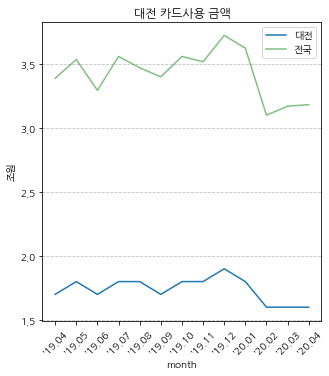

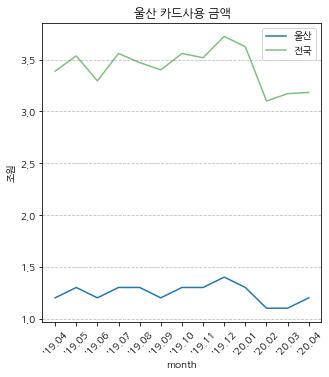

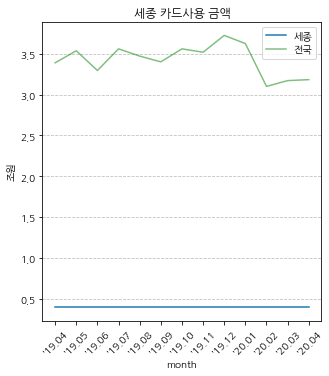

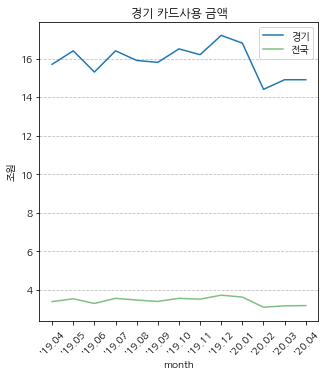

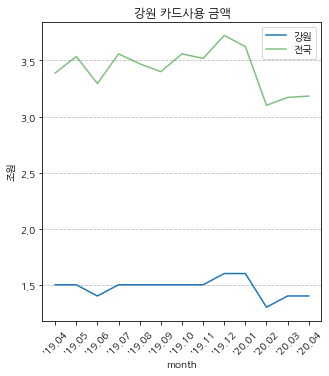

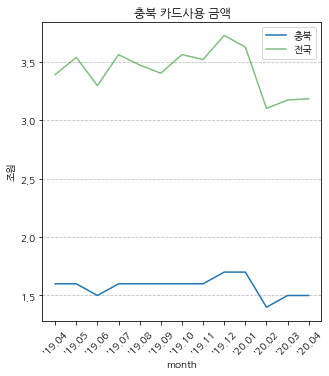

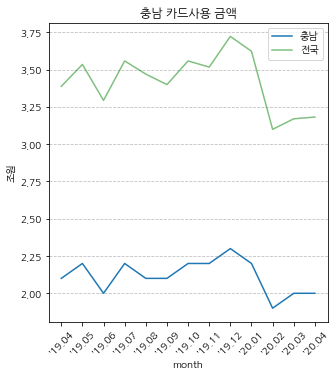

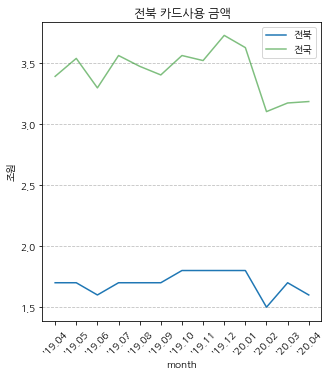

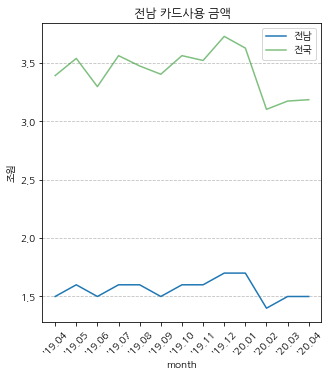

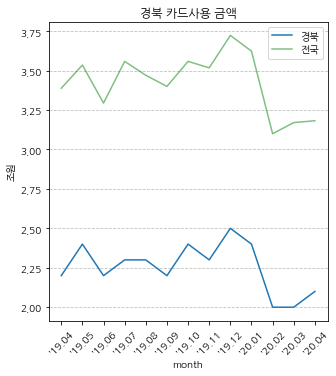

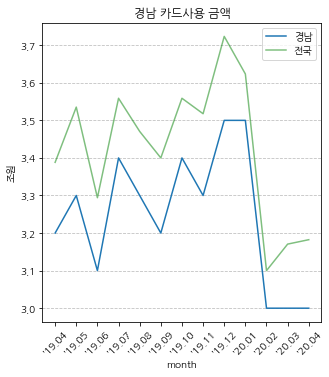

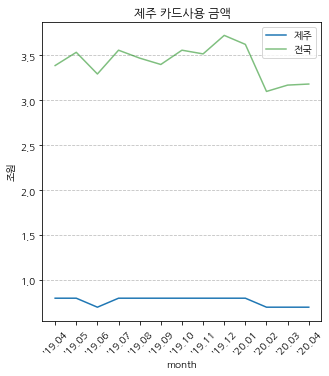

In [2]:
### 전국 한번에 저장

import pandas as pd
import numpy as np
import seaborn as sns
from openpyxl import load_workbook
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') # For Windows # 한글폰트

def loc_card_spend():
    loc_list = ['서울','부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남','전북','전남','경북','경남','제주']
    for loc_name in loc_list:
        data = pd.read_csv("C:/Users/acorn/Acon_jaeseo/teamproject/data/card_spend_pre_data.csv")
        # 입력 지역기반 그래프 작성
        plt.figure(figsize=(5,5.5))
        plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
        # x축
        x = data["사용금액(조원)기준년월"]
        # y축
        y1 = data[loc_name] 
        plt.xlabel("month")
        plt.ylabel("조원")
        plt.plot(x, y1, label = loc_name)
        plt.title(loc_name + " 카드사용 금액")

        # 전국평균 막대그래프
        # y축
        y2 = data['전국평균']
        plt.plot(x, y2, label = "전국", color="g", alpha=0.5)
        plt.legend()
        plt.xticks(rotation=45) #x축 라벨 기울기
        plt.savefig('코로나_{}_카드사용금액.png'.format(loc_name)) # png형식 저장

loc_card_spend()

### 2-2. 전국 그래프

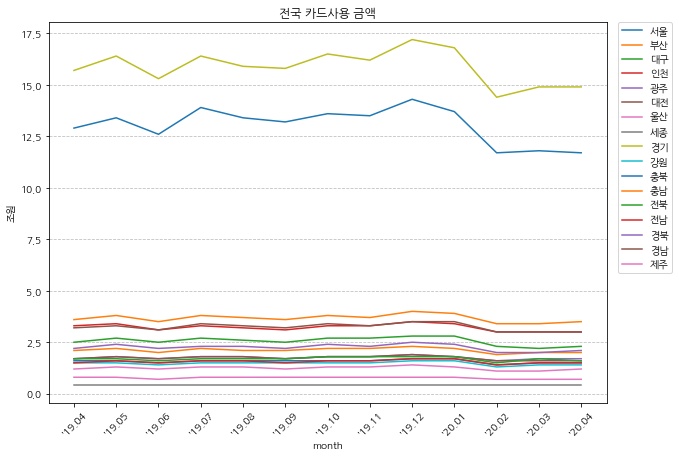

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from openpyxl import load_workbook
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') # For Windows # 한글폰트

def all_card_spend():
    data = pd.read_csv("C:/Users/acorn/Acon_jaeseo/teamproject/data/card_spend_pre_data.csv")
    plt.figure(figsize=(10,7))
    # 서울부터 제주까지 
    # x축
    x = data["사용금액(조원)기준년월"]
    # y축
    y = data.loc[:, "서울":"제주"]
    plt.title("전국 카드사용 금액")
    plt.xlabel("month")
    plt.ylabel("조원")
    # 그래프 그리기
    labels = plt.labes=data.iloc[0:0, 2:19] # 범례표시를 위한 레이블
    plt.plot(x, y)
    plt.xticks(rotation=45)
    plt.legend(labels, loc='best', bbox_to_anchor=(1.02, 1), borderaxespad=0)
    plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
    plt.savefig('코로나_전국_카드사용금액.png') # png형식 저장
    
all_card_spend()